In [110]:
# Инициализируем библиотеки:
import numpy
import scipy.special

# Определение класса НС
class neuralNetwork:

    # инициализируем НС
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        # задание количества узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # описание матрицы весовых коэффициентов и весов между слоями
        # i - внутренний; h - скрытый; o - выходной.
        self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0,5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes,-0,5),(self.onodes,self.hnodes))
        
        # коэффициент обучения
        self.learn = learningrate
        pass
        
        # задание функции активации
        self.activation_function = lambda x: scipy.special.expit(x)
        
    # тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        
        # можно ли вызвать отсюда метод erry(self, inputs_list) ?
                
        # преобразовать список входных значений в двумерный массив (зачем?)
        inputs = numpy.array(inputs_list,ndmin=2).T   # зачем транспонировать ?
        
        # преобразовать список тренировочной выборки в двумерный массив (зачем?)
        targets = numpy.array(targets_list,ndmin=2).T # зачем транспонировать ?
        
        # взвешенная сумма для скрытого слоя
        hidden_wsum = numpy.dot(self.wih, inputs)

        # выходные сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_wsum)

        # взвешенная сумма для последнего слоя
        final_wsum = numpy.dot(self.who, hidden_outputs)

        # выходные сигналы для последнего слоя
        final_outputs = self.activation_function(final_wsum)
        
        # рассчитать ошибку сети
        output_errors = targets - final_outputs
        
        # ошибки скрытого слоя сети (обратное распространение)
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # обновить весовые коэффициенты связей между скрытым и выходным слоями
        self.who += self.learn*numpy.dot(output_errors*final_outputs*(1.0 - final_outputs),numpy.transpose(hidden_outputs))
        
        # обновить весовые коэффициенты связей между входным и скрытым слоями
        self.wih += self.learn*numpy.dot(hidden_errors*hidden_outputs*(1.0 - hidden_outputs),numpy.transpose(inputs))
        
        pass
    
    # опрос нейронной сети
    def qerry(self, inputs_list):
        # преобразовать список входных значений в двумерный массив
        inputs = numpy.array(inputs_list,ndmin=2).T
        
        # взвешенная сумма скрытого слоя
        hidden_wsum = numpy.dot(self.wih, inputs)

        # выходные сигналы скрытого слоя
        hidden_outputs = self.activation_function(hidden_wsum)

        # взвешенная сумма последнего слоя
        final_wsum = numpy.dot(self.who, hidden_outputs)

        # рассчитать выходные сигналы для последнего слоя
        final_outputs = self.activation_function(final_wsum)
        
        return final_outputs

In [111]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# коэффициет обучения
learning_rate = 0.3

# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# загрузить в список тестовый набор данных MNIST из SCV-файла
training_data_file = open("MNIST/mnist_train_60k.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# тренировка нейронной сети

# перебрать все записи в тренировочном наботе данных
for record in training_data_list:
    # получить список значений, используя символ ','
    all_values = record.split(',')
    # масштабировать и сместить исходные значения 
    #(нормировать в диапазоне 0.01..0.99)
    inputs = (numpy.asfarray(all_values[1:])*0.99/255.0)+0.01
    # подготовить целевые выходные значения (все равны 0,01 за исключением
    # желаемого маркерного значения 0.99)
    targets = numpy.zeros(output_nodes)+0.01
    # all_values[0] - целевое маркерное значение для данной записи
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass

9
[[0.000078]
 [0.000605]
 [0.002089]
 [0.000649]
 [0.073230]
 [0.001819]
 [0.000494]
 [0.004545]
 [0.004040]
 [0.976022]]


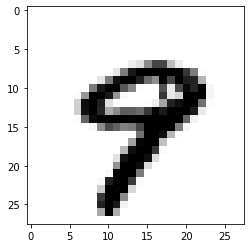

In [122]:
# загрузить в список тестовый набор данных MNIST из SCV-файла
float_formatter = "{:.6f}".format
numpy.set_printoptions(formatter={'float_kind':float_formatter})

test_data_file = open("MNIST/mnist_test_10.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

Number = 9
all_values = test_data_list[Number].split(',')
print(all_values[0])

import matplotlib.pyplot
%matplotlib inline
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation = 'None')

inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
outputs = n.qerry(inputs)
print(outputs)

ЌҐ г¤ Ґвбп ­ ©вЁ гЄ § ­­л© д ©«.
